In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
hd=pd.read_csv('heart_disease.csv')
hd


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [5]:
hd.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [7]:
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [9]:
hd.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [11]:
hd=hd.dropna()

In [12]:
hd.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [15]:
hd.duplicated().sum()

1

In [17]:
hd.drop_duplicates(inplace=True)

In [19]:
hd.duplicated().sum()

0

In [21]:
# Model Building

In [23]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
sf = pd.DataFrame(hd)

#initalizing the encoder
label_encoder = LabelEncoder()

#Apply Encoder to specific columns
columns_to_encode = ['sex','cp','fbs','restecg','exang','slope','thal']
for col in columns_to_encode:
    sf[col] = label_encoder.fit_transform(sf[col])

print(sf)

     age  sex  cp  trestbps  chol  fbs  restecg  thalch  exang  oldpeak  \
0     63    1   3       145   233    1        0     150      0      2.3   
1     41    1   1       135   203    0        1     132      0      0.0   
2     57    1   0       140   192    0        1     148      0      0.4   
3     52    1   3       118   186    0        0     190      0      0.0   
4     57    1   0       110   201    0        1     126      1      1.5   
..   ...  ...  ..       ...   ...  ...      ...     ...    ...      ...   
901   51    1   0       110     0    1        1      92      0      0.0   
902   62    1   0       160   254    1        2     108      1      3.0   
903   53    1   0       125     0    0        1     120      0      1.5   
904   62    1   0       166   170    0        2     120      1      3.0   
905   56    1   2       170     0    0        0     123      1      2.5   

     slope  thal  num  
0        0     0    0  
1        1     0    0  
2        1     0    0  
3  

In [25]:
x =sf.iloc[:,:-1]
y = sf['num']
y

0      0
1      0
2      0
3      0
4      0
      ..
901    4
902    4
903    4
904    4
905    4
Name: num, Length: 845, dtype: int64

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [29]:
xtrain.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
136,51,1,3,125,213,0,0,125,1,1.4,2,1
850,53,1,0,144,300,1,2,128,1,1.5,1,2
857,58,1,0,160,256,1,0,113,1,1.0,2,1
135,74,0,1,120,269,0,0,121,1,0.2,2,1
514,60,1,0,130,0,1,2,130,1,1.1,0,0


In [31]:
ytrain

136    0
850    3
857    3
135    0
514    1
      ..
751    2
813    3
73     0
236    0
38     0
Name: num, Length: 676, dtype: int64

In [33]:
xtest.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
507,38,1,0,110,289,0,1,105,1,1.5,0,1
224,54,0,1,120,221,0,1,138,0,1.0,2,0
330,55,0,1,122,320,0,1,155,0,0.0,1,1
485,58,1,0,125,300,0,0,171,0,0.0,2,2
319,41,0,1,130,245,0,1,150,0,0.0,1,1


In [35]:
ytest.head()

507    1
224    0
330    0
485    1
319    0
Name: num, dtype: int64

In [37]:
dt = DecisionTreeClassifier(criterion='entropy')

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
ypred

array([2, 0, 0, 2, 0, 3, 3, 3, 4, 1, 0, 3, 0, 3, 3, 2, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 2, 3, 0, 0,
       2, 0, 0, 0, 2, 1, 1, 1, 3, 0, 1, 1, 0, 0, 1, 0, 1, 3, 0, 1, 1, 1,
       2, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 1, 2, 0, 0, 2, 0, 2, 4, 1, 0,
       2, 0, 1, 2, 1, 1, 1, 3, 0, 2, 0, 0, 0, 1, 3, 0, 0, 1, 1, 1, 2, 1,
       2, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 2, 3, 4, 2, 2, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 3, 0, 0, 2, 0, 0, 0, 3, 0, 1, 2,
       1, 0, 0, 0, 3, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1], dtype=int64)

In [39]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal'],
      dtype='object')

In [41]:
dt.feature_importances_#Information Gain Highest value -root Node remaing -decision node

array([0.14440292, 0.02619541, 0.11478966, 0.12419657, 0.15076681,
       0.01938307, 0.0320251 , 0.14925113, 0.03357723, 0.12346744,
       0.04061279, 0.04133186])

In [43]:
# 5.Model Evaluation

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70        70
           1       0.33      0.34      0.34        44
           2       0.27      0.25      0.26        24
           3       0.29      0.22      0.25        23
           4       0.00      0.00      0.00         8

    accuracy                           0.47       169
   macro avg       0.31      0.31      0.31       169
weighted avg       0.44      0.47      0.45       169



In [49]:
dt.score(xtrain,ytrain)
dt.score(xtest,ytest)

0.46745562130177515

In [51]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', np.round(dt.score(xtest,ytest),2))

Training accuracy:  1.0
Testing Accuracy:  0.47


In [53]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal'],
      dtype='object')

In [55]:
x.head

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  restecg  thalch  exang  oldpeak  \
0     63    1   3       145   233    1        0     150      0      2.3   
1     41    1   1       135   203    0        1     132      0      0.0   
2     57    1   0       140   192    0        1     148      0      0.4   
3     52    1   3       118   186    0        0     190      0      0.0   
4     57    1   0       110   201    0        1     126      1      1.5   
..   ...  ...  ..       ...   ...  ...      ...     ...    ...      ...   
901   51    1   0       110     0    1        1      92      0      0.0   
902   62    1   0       160   254    1        2     108      1      3.0   
903   53    1   0       125     0    0        1     120      0      1.5   
904   62    1   0       166   170    0        2     120      1      3.0   
905   56    1   2       170     0    0        0     123      1      2.5   

     slope  thal  
0        0     0  
1        1     0  
2        1  

In [57]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [59]:
hd['num'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

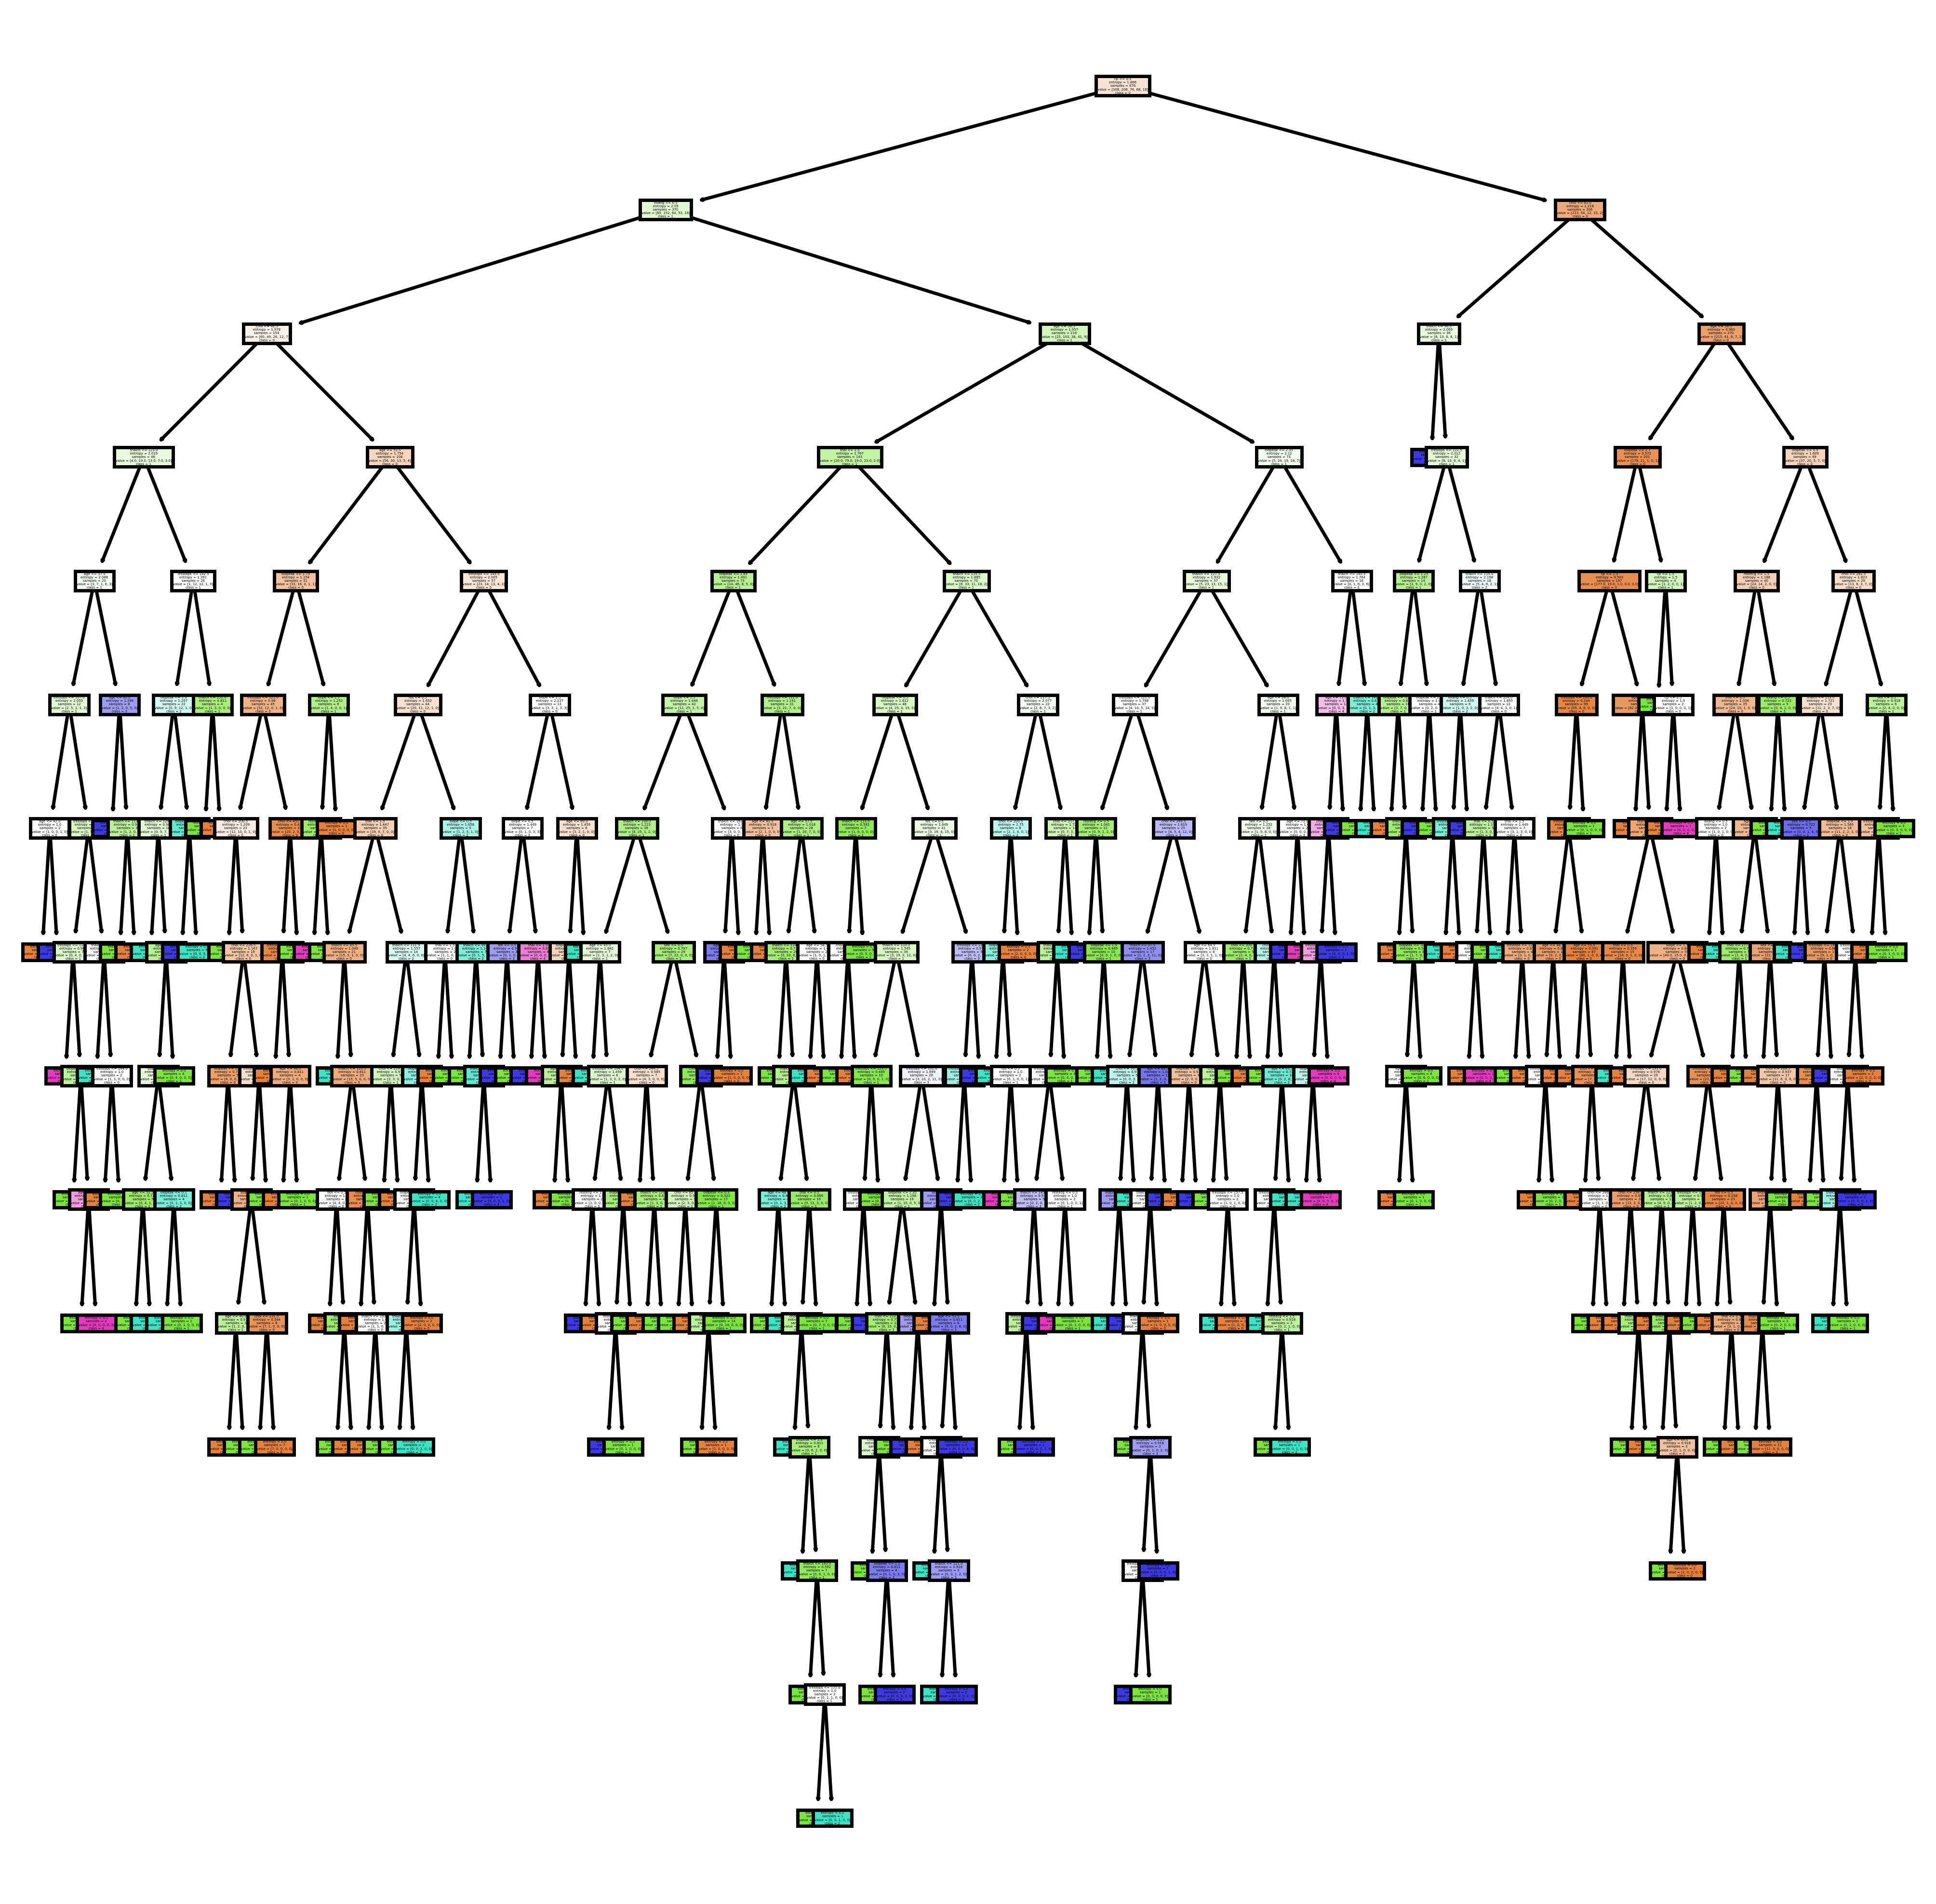

In [61]:
tree.plot_tree(dt,feature_names=x.columns, class_names=[str(i) for i in y.unique()],filled=True)
plt.show()

In [63]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal'],
      dtype='object')

In [65]:
dt.feature_importances_ #It returns information gain of all columns

array([0.14440292, 0.02619541, 0.11478966, 0.12419657, 0.15076681,
       0.01938307, 0.0320251 , 0.14925113, 0.03357723, 0.12346744,
       0.04061279, 0.04133186])

In [67]:
# Hyperparameter tuning

In [69]:
#pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [71]:
from sklearn.tree import DecisionTreeRegressor

In [73]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [75]:
from sklearn.model_selection import GridSearchCV

In [77]:
params= {
    'criterion' :['squared_erors','absolute_errors'],
    'max_depth' :[1,2,3,4,5,6,7,8,9],
    'splitter'  :['best','random']
}

In [83]:
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=params,verbose=1)

In [85]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


ValueError: 
All the 180 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SWAPNIL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SWAPNIL\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\SWAPNIL\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\SWAPNIL\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of DecisionTreeRegressor must be a str among {'absolute_error', 'friedman_mse', 'squared_error', 'poisson'}. Got 'squared_erors' instead.

--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SWAPNIL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SWAPNIL\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\SWAPNIL\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\SWAPNIL\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of DecisionTreeRegressor must be a str among {'absolute_error', 'friedman_mse', 'squared_error', 'poisson'}. Got 'absolute_errors' instead.


In [87]:
grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'